In [13]:
# pip install mlxtend

import time
import random
from math import *
import operator
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 10000)
import string
from pprint import pprint
from scipy import stats
import itertools

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import style
%matplotlib inline 

from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# load make_blobs to simulate data
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from statsmodels.tools.eval_measures import rmse
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans

from mlxtend.classifier import StackingClassifier
from mlxtend.regressor import StackingRegressor

# pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import adjusted_rand_score

In [14]:
# Loading dataset and view a few records.
df = pd.read_csv('E:\\MYLEARN\\2-ANALYTICS-DataScience\\datasets\\diabetes.csv')

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
df.shape

(768, 9)

In [17]:
# Train test split

attributes = list(df.columns[:8])

X = df[attributes].values
y = df['Outcome'].values    


In [18]:
scaler = StandardScaler()

scaler.fit(X)

rescaledX = scaler.transform(X)

In [19]:
# Split into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(rescaledX, y, test_size = 0.20, random_state =0)

In [20]:
# base estimators
clf1 = KNeighborsClassifier(n_neighbors=3)
clf2 = RandomForestClassifier(n_estimators=100)
clf3 = GaussianNB()

# meta estimator
lr   = LogisticRegression(solver='lbfgs')

In [21]:
# instantiate the stacking model
sclf = StackingClassifier(classifiers     = [clf1, clf2, clf3], 
                          meta_classifier = lr)

In [22]:
print('3-fold cross validation:\n')

3-fold cross validation:



In [23]:
for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'StackingClassifier']):
    
    scores = cross_val_score(clf, 
                             rescaledX[:, 1:3], 
                             y, 
                             cv=3, 
                             scoring='accuracy')
    
    
    #print(scores)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), 
             scores.std(), 
             label))

Accuracy: 0.72 (+/- 0.02) [KNN]
Accuracy: 0.70 (+/- 0.01) [Random Forest]
Accuracy: 0.74 (+/- 0.01) [Naive Bayes]
Accuracy: 0.70 (+/- 0.01) [StackingClassifier]


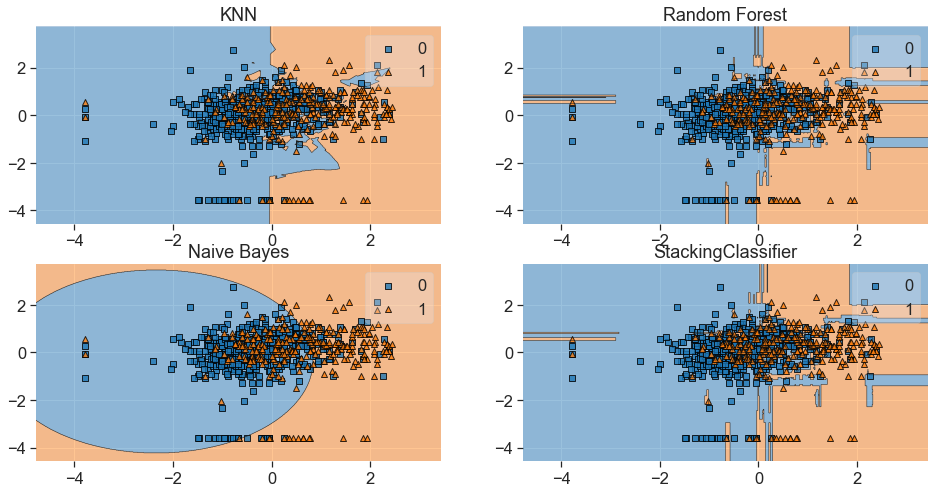

In [24]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(16, 8))

for clf, lab, grd in zip([clf1, clf2, clf3, sclf], 
                         ['KNN', 
                          'Random Forest', 
                          'Naive Bayes',
                          'StackingClassifier'],
                          itertools.product([0, 1], repeat=2)):

    clf.fit(rescaledX[:, 1:3], y)
    
    ax = plt.subplot(gs[grd[0], grd[1]])
    
    fig = plot_decision_regions(X=rescaledX[:, 1:3], y=y, clf=clf)
    
    plt.title(lab)